# SCHIZO DATASET

In [187]:
import os
from os.path import join, isdir, exists
from matplotlib import pyplot as plt
import pandas as pd
import nibabel as nib
import shutil

ROOT = "/home/tbarba/projects/MultiModalBrainSurvival/"
DATA = join(ROOT, "data/MR/SCHIZO/images/")
DESTINATION = join(DATA, "selected")



# Extraction of T1 and T2 sequences in individual case folders

In [184]:
def list_cases(path):
    cases = [c for c in os.listdir(path) if c.endswith("scans.tsv")]
    return cases

def get_case_id(filename):
    case_id = filename.split('_')[0][4:]
    return case_id

cohortdirs = [join(DATA, c) for c in ["COBRE", "MCICS"]]

for cohortdir in cohortdirs:
    cases = [get_case_id(case) for case in list_cases(cohortdir)]

    for case in cases:
        scans = [s for s in os.listdir(cohortdir) if case in s]
        try:
            T1 = [s for s in scans if "nii.gz" in s if "T1" in s][0]
            T2 = [s for s in scans if "nii.gz" in s if "T2" in s][0]
            seq = [T1,T2]

            if len(seq) == 2:
                case_dir = join(DESTINATION, case)
                os.makedirs(case_dir, exist_ok=True)
                    
                for s in seq:
                    shutil.copy(join(cohortdir, s), join(case_dir, s))
                    pass
            else:
                print(seq)

        except:
            pass



Next steps : (script = BrainExtraction.py)
- Brain extraction
- Resample (ukb affine)
- Cropping

## Viewer

(157, 181, 185)


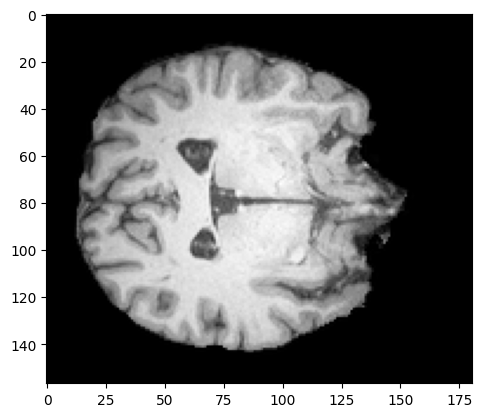

In [198]:

img = nib.load("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/SCHIZO/images/selected/A00000300/A00000300-masked-T1w.nii.gz")
slice = img.get_fdata()[:,:,100]

print(img.shape)
plt.imshow(slice, cmap="Greys_r")

In [189]:
UKB_AFFINE = nib.load(join(ROOT, "data/MR/UKBIOBANK/images/1000739/1000739_T1.nii.gz")).affine

extr2 = resample_img(img, target_affine=UKB_AFFINE)
# npl.plot_anat(extr2)

extr3 = nl.image.crop_img(extr2)
slice = extr3.get_fdata()[:,:,150]
plt.imshow(slice, cmap="Greys_r")

/labs/gevaertlab/users/thomas/miniconda/envs/crashtest/lib/python3.9/site-packages/nilearn/image/resampling.py:545: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


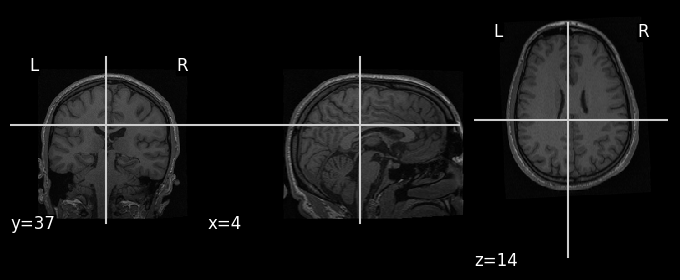

In [117]:
pa = nib.load(
    "/home/tbarba/projects/MultiModalBrainSurvival/data/MR/SCHIZO/images/test/T1MCICS.nii.gz")

# pa = nib.load("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UCSF/images/UCSF-PDGM-0004/UCSF-PDGM-0004_FLAIR.nii.gz")
pa2 = resample_img(pa, target_affine=toaff)
npl.plot_anat(pa2)
